<a href="https://colab.research.google.com/github/ritwika2000/Political_sentiment_analysis/blob/main/Subject_prediction_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:

In [2]:
!pip install --upgrade --force-reinstall --no-deps transformers
!pip install --upgrade --force-reinstall --no-deps datasets

!pip install --upgrade --force-reinstall --no-deps huggingface_hub

!pip install --upgrade --force-reinstall --no-deps pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached datasets-2.12.0-py3-none-any.whl (474 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 2.12.0
    Uninstalling datasets-2.12.0:
      Successfully uninstalled datasets-2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface

In [3]:
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
path='drive/MyDrive/political_tweets.csv'
df=pd.read_csv(path ,delimiter='|')
df.head()

,Unnamed: 0,last_updated,tweet_id,created_at,user_location,full_text,quote_count,reply_count,retweet_count,favorite_count,...,Pos_VERB_count,Neg_VERB_count,Pos_ADV_count,Neg_ADV_count,neg,neu,pos,compound,weighted_compound,weighted_compound_new
0,0,2019-03-06T17:30:21.000+05:30,1.103136e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...,0,4.0,113.0,113.0,...,0.0,0.0,0.0,0.0,0.000,0.880,0.120,0.6486,73.2918,0.000911
1,1,2019-03-17T18:11:58.000+05:30,1.107333e+18,2019-03-17T17:27:57.000+05:30,NaN,RSS in school days itself? Indoctrinated since...,0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.332,0.579,0.088,-0.7906,-3.9530,-0.000303
2,2,2019-03-23T18:07:38.000+05:30,1.109417e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...,0,4.0,31.0,31.0,...,0.0,0.0,0.0,0.0,0.130,0.870,0.000,-0.6900,-21.3900,-0.000577
3,3,2019-03-11T17:47:32.000+05:30,1.100300e+18,2019-02-26T07:40:28.000+05:30,NaN,"India's #Icecream Industry stands at 15,000 cr...",0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.000,0.955,0.045,0.1779,0.5337,-0.000232
4,4,2019-02-27T18:18:42.000+05:30,1.100733e+18,2019-02-27T12:21:18.000+05:30,Delhi | Odisha,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,0,0.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.362,0.638,0.000,-0.9638,-8.6742,-0.000377


In [5]:
df.shape

(46043, 44)

In [6]:
#the number of null value in each column
df.isnull().sum()

Unnamed: 0                       0
last_updated                     0
tweet_id                         2
created_at                       2
user_location                 5779
full_text                        2
quote_count                   1402
reply_count                   1410
retweet_count                    7
favorite_count                   0
hashtags                     36836
user_mentions_screen_name    28320
OfImportance                     7
subject                          7
ADJ                              7
NOUN                             7
VERB                             7
ADV                              7
Pos_ADJ                          7
Neg_ADJ                          7
Pos_NOUN                         7
Neg_NOUN                         7
Pos_VERB                         8
Neg_VERB                         8
Pos_ADV                         12
Neg_ADV                          8
City                         30330
State                        28788
District            

In [7]:
#fill the missing value with empty string
df['hashtags']=df[['hashtags']].fillna('')
df['user_location']=df[['user_location']].fillna('')
df['full_text']=df[['full_text']].fillna('')
df['subject']=df[['subject']].fillna('')

In [8]:
#the number of missing value in each column
df.isnull().sum()

Unnamed: 0                       0
last_updated                     0
tweet_id                         2
created_at                       2
user_location                    0
full_text                        0
quote_count                   1402
reply_count                   1410
retweet_count                    7
favorite_count                   0
hashtags                         0
user_mentions_screen_name    28320
OfImportance                     7
subject                          0
ADJ                              7
NOUN                             7
VERB                             7
ADV                              7
Pos_ADJ                          7
Neg_ADJ                          7
Pos_NOUN                         7
Neg_NOUN                         7
Pos_VERB                         8
Neg_VERB                         8
Pos_ADV                         12
Neg_ADV                          8
City                         30330
State                        28788
District            

In [9]:
df=df[['full_text','subject']]
df.head()

,full_text,subject
0,Guwahati has gained a lot of prominence in rec...,Bjp
1,RSS in school days itself? Indoctrinated since...,Bjp
2,Words don't exist in Vaccum!\nModi's post Pulw...,Bjp
3,"India's #Icecream Industry stands at 15,000 cr...",Congress
4,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,Bjp


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

In [13]:
#preprocess the text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["full_text"] = df["full_text"].apply(clean)


In [14]:
#check the distribution of labels 
df['subject'].value_counts()

Bjp                   24293
Congress              19887
Others                 1851
                          7
[]                        2
['not', 'instead']        1
['govt']                  1
['now']                   1
Name: subject, dtype: int64

In [15]:
df['subject_num'] = df['subject'].map({
    'Bjp' : 0, 
    'Congress': 1, 
    'Others': 2,
    '[]':2,
    ' ':2
})

In [16]:
df = df.dropna()

In [17]:
df['subject_num'].value_counts()

0.0    24293
1.0    19887
2.0     1853
Name: subject_num, dtype: int64

In [18]:
df=df[['full_text','subject_num']]

In [19]:
from datasets import Dataset

ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['full_text', 'subject_num', '__index_level_0__'],
    num_rows: 46033
})

In [20]:
train_test_valid = ds.train_test_split()

test_valid = train_test_valid['test'].train_test_split()

train_test_valid_dataset = DatasetDict({
    'train': train_test_valid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
    })

In [21]:
dataset = load_dataset('csv', data_files=path, split='train')

dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

ERROR:datasets.packaged_modules.csv.csv:Failed to read file '/content/drive/MyDrive/political_tweets.csv' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Expected 1 fields in line 4, saw 17



DatasetGenerationError: ignored

In [22]:
dataset=train_test_valid_dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['full_text', 'subject_num', '__index_level_0__'],
        num_rows: 34524
    })
    test: Dataset({
        features: ['full_text', 'subject_num', '__index_level_0__'],
        num_rows: 2878
    })
    valid: Dataset({
        features: ['full_text', 'subject_num', '__index_level_0__'],
        num_rows: 8631
    })
})

In [23]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [24]:
text = "Just checking tokenization"

output = tokenizer(text)

output

{'input_ids': [101, 2066, 9444, 22559, 2734, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [25]:
tokens = tokenizer.convert_ids_to_tokens(output['input_ids'])
tokens

['[CLS]', 'Just', 'checking', 'token', '##ization', '[SEP]']

In [26]:
print(f"Tokenized text: {tokenizer.convert_tokens_to_string(tokens)}")

Tokenized text: [CLS] Just checking tokenization [SEP]


In [27]:
print(f"Vocab size is : {tokenizer.vocab_size}")

print(f"Model max length is : {tokenizer.model_max_length}")

print(f"Model input names are: {tokenizer.model_input_names}")

Vocab size is : 28996
Model max length is : 512
Model input names are: ['input_ids', 'token_type_ids', 'attention_mask']


In [28]:
ds

Dataset({
    features: ['full_text', 'subject_num', '__index_level_0__'],
    num_rows: 46033
})

In [29]:
def tokenize_function(train_dataset):
    return tokenizer(train_dataset['full_text'], padding='max_length', truncation=True) 


tokenized_dataset = dataset.map(tokenize_function, batched=True)

tokenized_dataset

train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['valid']
test_dataset = tokenized_dataset['test']

Map:   0%|          | 0/34524 [00:00<?, ? examples/s]

Map:   0%|          | 0/2878 [00:00<?, ? examples/s]

Map:   0%|          | 0/8631 [00:00<?, ? examples/s]

In [30]:
train_dataset

Dataset({
    features: ['full_text', 'subject_num', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 34524
})

In [31]:
train_set = train_dataset.remove_columns(['full_text']).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(['full_text']).with_format('tensorflow')

tf_test_dataset = test_dataset.remove_columns(['full_text']).with_format('tensorflow')

In [32]:
train_features = { x: train_set[x] for x in tokenizer.model_input_names  }

train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['subject_num'] ))

train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(8)


eval_features = {x: tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["subject_num"]))
val_set_for_final_model = val_set_for_final_model.batch(8)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset["subject_num"]))
test_set_for_final_model =test_set_for_final_model.batch(8)

In [33]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)
# model = TFAutoModelForSequenceClassification.from_pretrained("/mnt/e0ccdbdb-22c3-4d9b-9413-fd976a2e99ae/M1/Code_Org/HF_Models/bert-base-uncased", num_labels=3)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
history = model.fit(train_set_for_final_model, validation_data=val_set_for_final_model, epochs=2)

Epoch 1/2
4316/4316 [==============================] - 4483s 1s/step - loss: 0.2414 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.2066 - val_sparse_categorical_accuracy: 0.9349
Epoch 2/2
4316/4316 [==============================] - 4417s 1s/step - loss: 0.1994 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.1238 - val_sparse_categorical_accuracy: 0.9600


In [36]:
predict_score_and_class_dict = {0: 'Bjp',
 1: 'Congress',
 2: 'Others'}
preds = model(tokenizer(["He dresses up like a begger thise days"],return_tensors="tf",padding=True,truncation=True))['logits']
class_preds = np.argmax(preds, axis=1)
predict_score_and_class_dict[pred]


'Congress'

In [37]:
path='drive/MyDrive/final_toi.csv'
news=pd.read_csv(path)
news.head()

,Unnamed: 0.1,Unnamed: 0,Title,Time,URL,Paper,Subject,Subject.1,Sentiment
0,0,0,"Covid-19 numbers will rise for 10-12 days, the...","17 Mar 2023, 10:34",/india/covid-numbers-will-rise-for-10-12-days-...,Times of India,Others,Others,Neutral
1,1,1,"‘Won’t wait for panel’, SC to rule on quota fo...","16 Mar 2023, 22:37",/india/wont-wait-for-panel-sc-to-rule-on-quota...,Times of India,Others,Others,Neutral
2,2,2,Why Rahul can't win against Modi on democracy ...,"15 Mar 2023, 19:46",/india/has-congress-misread-the-national-mood-...,Times of India,Congress,Congress,Negative
3,3,3,Bathinda military station firing: What we know...,"14 Mar 2023, 22:34",/city/chandigarh/bathinda-military-station-fir...,Times of India,Others,Others,Negative
4,4,4,"Live: India logs over 10k cases in 24 hours, h...","14 Mar 2023, 22:26",/india/coronavirus-in-india-live-updates-april...,Times of India,Bjp,Bjp,Neutral


In [38]:
news=news[['Title','Subject']]
news.head()

,Title,Subject
0,"Covid-19 numbers will rise for 10-12 days, the...",Others
1,"‘Won’t wait for panel’, SC to rule on quota fo...",Others
2,Why Rahul can't win against Modi on democracy ...,Congress
3,Bathinda military station firing: What we know...,Others
4,"Live: India logs over 10k cases in 24 hours, h...",Bjp


In [42]:
i=0
score=0

for title in news['Title']:
  preds = model(tokenizer([title],return_tensors="tf",padding=True,truncation=True))['logits']
  class_preds = np.argmax(preds, axis=1)
  for pred in class_preds:
     if(predict_score_and_class_dict[pred] == news['Subject'][i]):
       score+=1
  i+=1

print(score/1000)      

0.444


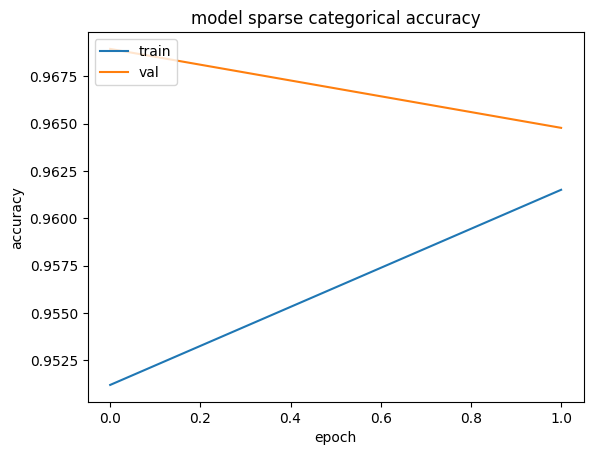

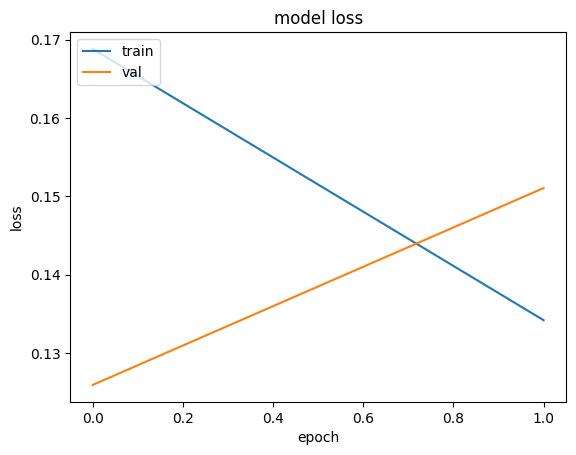

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model sparse categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_set_for_final_model,verbose=2)
print('\nTest accuracy:', test_acc)

360/360 - 120s - loss: 0.1440 - sparse_categorical_accuracy: 0.9663 - 120s/epoch - 334ms/step

Test accuracy: 0.9662960171699524


In [ ]:
model.save_pretrained('subject_bert.h5')

In [ ]:
from tensorflow.keras.models import load_model
from transformers import TFBertModel
loaded_model = load_model('subject_bert', custom_objects={'TFBertModel': TFBertModel})

OSError: ignored